### Imports

In [86]:
import numpy as np
import matplotlib.pyplot as plt

### Free fall with nonzero initial velocity
Simulated solution

In [87]:
const_g = 9.81
delta = .1
ts = np.arange(0,7,delta)
init_h = 100
init_v = -10

h = init_h
v = init_v

trajectory = {"height":[], "velocity":[]}
for t in ts:
    h = h - v * delta
    v = v + const_g*delta
    if h > 0:
        trajectory["height"].append(h)
        trajectory["velocity"].append(v)
    else:
        trajectory["height"].append(0)
        trajectory["velocity"].append(0)

Analytic solution

In [88]:
def calc_h(t, init_h):
    return max(init_h - (const_g*t**2)/2 - init_v*t
               , 0) #Height can't be below 0

def calc_v(t, init_v):
    if (init_v + const_g*t) > np.sqrt(2*const_g*init_h):
        return 0 #Velocity can't be higher than final
    else:
        return init_v + const_g*t

calc_trajectory = {
    "height": [calc_h(t, init_h) for t in ts],
    "velocity": [calc_v(t, init_v) for t in ts]
}


Comparison

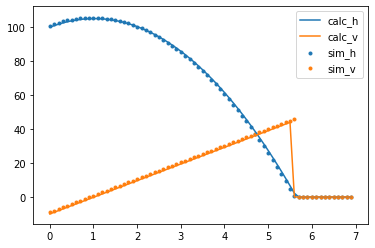

In [89]:
plt.plot(ts, calc_trajectory["height"], label="calc_h")
plt.plot(ts, calc_trajectory["velocity"], label="calc_v")
plt.scatter(ts, trajectory["height"], marker='.', label="sim_h")
plt.scatter(ts, trajectory["velocity"], marker='.', label="sim_v")
plt.legend()
plt.show()

### High delta to showcase numeric artifacts:

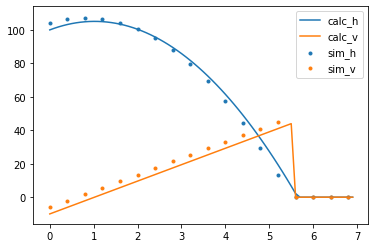

In [90]:
const_g = 9.81
high_delta = .4
hd_ts = np.arange(0,7,high_delta)
init_h = 100
init_v = -10

h = init_h
v = init_v

trajectory = {"height":[], "velocity":[]}
for t in hd_ts:
    h = h - v * high_delta
    v = v + const_g*high_delta
    if h > 0:
        trajectory["height"].append(h)
        trajectory["velocity"].append(v)
    else:
        trajectory["height"].append(0)
        trajectory["velocity"].append(0)
        
plt.plot(ts, calc_trajectory["height"], label="calc_h")
plt.plot(ts, calc_trajectory["velocity"], label="calc_v")
plt.scatter(hd_ts, trajectory["height"], marker='.', label="sim_h")
plt.scatter(hd_ts, trajectory["velocity"], marker='.', label="sim_v")
plt.legend()
plt.show()        